In [2]:
# Visualize the dataset
import pandas as pd
import matplotlib.pyplot as plt

Text(0.5, 0, 'Digit')

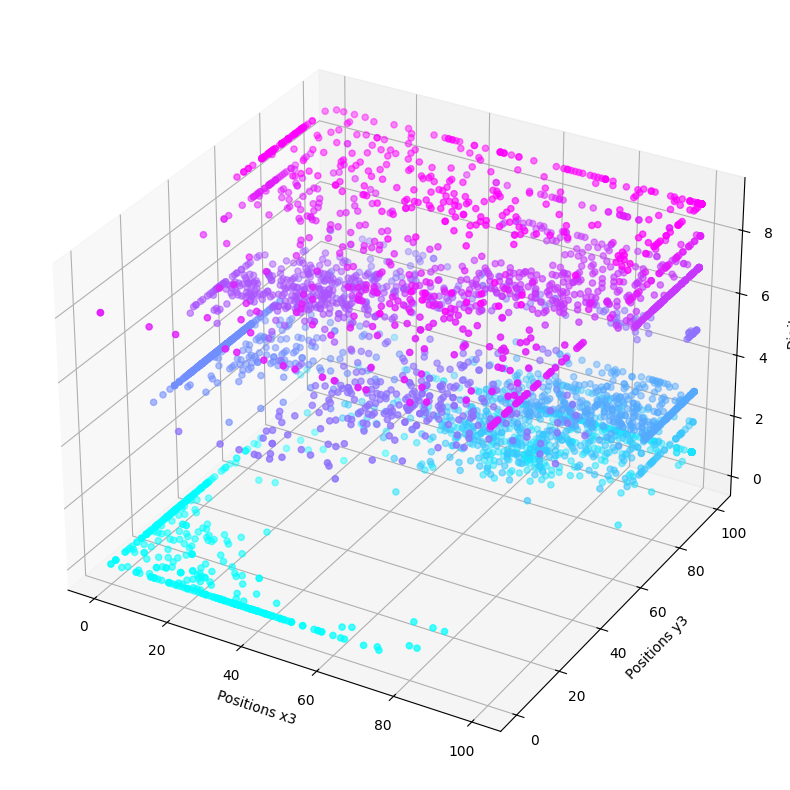

In [3]:
data = pd.read_csv(("data/studentsdigits-train.csv"))

# extract features and the digit label
features = data.iloc[:, :8]
labels = data["Digit"]

# scatter plot of each features
# fig, axs = plt.subplots(4, 1, figsize=(10, 10))
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
# axs = axs.flatten()
# for i in range(4):
#     # axs[i // 2, i % 2].scatter(features.iloc[:, i], labels)
#     ax[i].scatter(features.iloc[:, i], features.iloc[:, i + 1], c=labels, cmap="viridis")
#     ax[i].set_xlabel(f"Positions x{i+3} and y{i+3}")
#     ax[i].set_ylabel("Digit")

ax.scatter(features.iloc[:, 0], features.iloc[:, 1], labels, c=labels, cmap="cool")
ax.set_xlabel("Positions x3")
ax.set_ylabel("Positions y3")
ax.set_zlabel("Digit")

# plt.tight_layout()
# plt.show()


In [8]:
import plotly.graph_objs as go

trace = go.Scatter3d(
    x=features.iloc[:, 0],
    y=features.iloc[:, 1],
    z=labels,
    mode='markers',
    marker=dict(
        size=5,
        color=labels,
        colorscale='Viridis',
        opacity=0.8
    )
)

layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Positions x3'),
        yaxis=dict(title='Positions y3'),
        zaxis=dict(title='Digit')
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [12]:
# It seems like there some cluster show up at digit 1,2,3, and 7 that share same position. Lets try tsne
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(data[['x3', 'y3',]])

In [17]:
tsneScatter = go.Scatter(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    mode='markers',
    marker=dict(
        size=5,
        color=labels,
        colorscale='Viridis',
        opacity=0.8
    )
)
tsneLayout = go.Layout(
    title='X3 and Y3 t-SNE visualization',
    xaxis=dict(title='t-SNE 1'),
    yaxis=dict(title='t-SNE 2'),
    margin=dict(l=0, r=0, b=0, t=0)
)
tsneFig = go.Figure(data=[tsneScatter], layout=tsneLayout)
tsneFig.show()

In [18]:
x4_tsne = tsne.fit_transform(data[['x4', 'y4',]])
tsneScatter = go.Scatter(
    x=x4_tsne[:, 0],
    y=x4_tsne[:, 1],
    mode='markers',
    marker=dict(
        size=5,
        color=labels,
        colorscale='Viridis',
        opacity=0.8
    )
)
tsneLayout = go.Layout(
    title='X4 and Y4 t-SNE visualization',
    xaxis=dict(title='t-SNE 1'),
    yaxis=dict(title='t-SNE 2'),
    margin=dict(l=0, r=0, b=0, t=0)
)
tsneFig = go.Figure(data=[tsneScatter], layout=tsneLayout)
tsneFig.show()

In [22]:
# Try tsne reduction on all features
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(features)


In [24]:
tsneScatter = go.Scatter(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    mode='markers',
    marker=dict(
        size=5,
        color=labels,
        colorscale='Plasma',  # Specify the desired colorscale here
        opacity=0.8,
        colorbar=dict(title='Digit')
    ),
    text=labels.astype(str),
)
tsneLayout = go.Layout(
    title='All features t-SNE visualization',
    xaxis=dict(title='t-SNE 1'),
    yaxis=dict(title='t-SNE 2'),
    margin=dict(l=0, r=0, b=0, t=0)
)
tsneFig = go.Figure(data=[tsneScatter], layout=tsneLayout)
tsneFig.show()

With many island seems pretty mixed in between like 7 with 2 and 1, it seeems like simple linear classifier will not work really well => Could be our baseline